> **Project Title:** Churn Prediction<br>
> **Project Owner:** David Adarkwah<br>
> **Email:** davidwyse48@gmail.com<br>
> **Github Profile:** [Github](github.com/Adark-Amal)<br>
> **LinkedIn Profile:** [LinkedIn](https://www.linkedin.com/in/d-adark/)

## Table of Contents <a id='mu'></a>

* [Business Problem Understanding](#bpu)
    * [Problem Statement](#ps)
    * [Project Goal](#pg)
    * [Data Description](#dd)
    * [Methodology](#my)
* [Data Preparation](#dp)
* [Exploratory Data Analysis](#eda) 
* [Feature Engineering](#fe) 
* [Modeling](#dm)
* [Conclusion and Recommendation](#cr)
* [References](#r)

## 1. Business Problem Understanding<a id='bpu'></a>

[Move Up](#mu)

<p style="text-align:justify;">The initial stage in solving a data science problem is comprehending the problem at hand. This step is crucial as it enables us to identify the decisions we need to make, the data required to inform those decisions, and the analysis needed to arrive at them. Essentially, constructing a mental model of the problem helps us efficiently organize the relevant information necessary to solve the problem.</p>

### 1.1 Problem Statement <a id='ps'></a>

Our digital music service, similar to Spotify or Pandora, faces the challenge of user churn. Users either enjoy our free tier with advertisements between songs or subscribe to our premium plan, which offers an ad-free experience for a monthly fee. Users have the flexibility to upgrade, downgrade, or cancel their service at any time. Recognizing users who are at risk of churning – whether by downgrading from premium or canceling their service entirely – is crucial for our business. Identifying these users in advance allows us to offer incentives and discounts, potentially saving millions in revenue.

### 1.2 Project Goal <a id='pg'></a>

The primary objectives of this project are:

1. **Identify Churn Risk:** Develop a predictive model that can identify users at risk of churning from our digital music service based on their interactions.

2. **Retain Users:** Proactively target and retain users who are likely to downgrade from premium or cancel their service, potentially saving revenue and maintaining customer satisfaction.

3. **Select Optimal Model:** Evaluate and select the best-performing model based on the F1 score, considering the class imbalance, to guide churn prediction efforts effectively.

4. **Preliminary analysis:** Perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned.

### 1.3 Data Description <a id='dd'></a>

The dataset contains user activity logs from a digital music service similar to Spotify or Pandora. It comprises various user interactions and events while using the service. Key events include:

- **Cancel**: Users cancel their service.
- **Submit Downgrade**: Users request a downgrade from a premium plan.
- **Thumbs Down**: Users give a thumbs-down rating to a song.
- **Home**: Users visit the homepage.
- **Downgrade**: Users perform a downgrade.
- **Roll Advert**: Users encounter advertisements.
- **Logout**: Users log out of their accounts.
- **Save Settings**: Users save their settings.
- **Cancellation Confirmation**: Confirmation of user service cancellation.
- **About**: Users visit the "About" section.
- **Submit Registration**: Users submit registration.
- **Settings**: Users access their account settings.
- **Login**: Users log into their accounts.
- **Register**: Users register for the service.
- **Add to Playlist**: Users add songs to their playlists.
- **Add Friend**: Users add friends to their network.
- **NextSong**: Users play the next song.
- **Thumbs Up**: Users give a thumbs-up rating to a song.
- **Help**: Users seek help or support.
- **Upgrade**: Users upgrade their service to premium.

The primary objective is to predict user churn based on events such as `Cancellation Confirmation`. This dataset plays a crucial role in understanding user behavior and building predictive models to effectively retain customers.


### 1.4 Methodology <a id='my'></a>

<p style="text-align:justify;">The methodology that will be used for our project will largely depend on the goals we set out to achieve. The methodlogy framework below gives us a comprehensive guide on the methodology apparoach that will help us achieve our goals.</p>
<br>
<p style="text-align:center;font-weight:bold;font-size:20px"> Methodology Framework</p>
<br>
<div style='justify-content: center;text-align:center;'>
<img src='https://artofdatablog.files.wordpress.com/2017/10/methodology-map.jpg' style="float:center;width:700px;">
</div>

To tackle this project, we begin by loading the dataset into Apache Spark and filtering out any rows with missing userIds or sessionIds. Following this preprocessing step, we proceed to compute several metrics for each user based on the given data:

* Average number of songs per session
* Total number of thumbs down
* Total number of thumbs up
* Total number of errors encountered
* Number of Add to Playlist events
* Number of Add Friends events
* Total number of songs played

The target variable, or label, we aim to predict is `churn`, which is defined by users who have performed either a `Cancellation Confirmation` event.

After computing the aforementioned features, we construct a machine learning model using three different algorithms:

* Logistic Regression
* Random Forest Classifier
* Gradient Boosting Trees

We split the dataset into training and testing sets and build a machine learning pipeline. In this pipeline, each row is transformed into a single feature vector. Subsequently, the data within each column is standardized and fed into each of the aforementioned classifiers.

To evaluate the performance of the models, we utilize the F1 score metric. Given the small number of churned users, the F1 score is preferable as it provides a balanced measure in the presence of class imbalance. Additionally, we calculated the accuracy of each model, although our primary criterion for model selection is based on the F1 score.

## 2. Data Preparation <a id='dp'></a>

[Move Up](#mu)

An understanding of the data coupled with problem understanding will help us in cleaning and preparing our data for analysis. It is usually rare to acquire a ready-to-use data for any analysis without some level of preparation. To prepare our data, we normally assess the quality of the data, cleanse, format, blend and sample the data since we may encounter various issues with columns in our data. These issues may include:

* **`Missing values:`** meaning column values are incomplete
* **`Incorrect data:`** meaning you see values not expected for the column name
* **`Inconsistent values:`** meaning some values may fall outside the expected range
* **`Duplicate values:`** meaning whether or not there are duplicate values
* **`Inconsistent data type:`** meaning values entered in the columns may not be consistent with the column names

In [1]:
# Import libraries

import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import isnan, count, when, col, desc, udf, col, sort_array, asc, avg
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.window import Window
from pyspark.sql import Row
from pyspark.sql import functions as F
from pyspark.sql.functions import *

from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier, LinearSVC, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import CountVectorizer, IDF, PCA, RegexTokenizer, VectorAssembler, Normalizer, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

import datetime
import time

import pandas as pd
import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# Create a Spark session

spark = SparkSession \
    .builder \
    .appName("Adark Sparkify") \
    .getOrCreate()

In [3]:
spark.sparkContext.getConf().getAll()

[('spark.app.name', 'Adark Sparkify'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1707558504003'),
 ('spark.driver.port', '46729'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.host',
  '37968439766b5dbdcc745cf8d4b84fcf77bad631-d9cc5944-2xpxn')]

### 2.1 Data Cleaning and Preprocessing <a id='dqa'></a>
In this workspace, the mini-dataset file is `mini_sparkify_event_data.json`. Load and clean the dataset, checking for invalid or missing data - for example, records without userids or sessionids. 

In [4]:
# load in the dataset

df = spark.read.json("mini_sparkify_event_data.json")

In [5]:
# print the schema

df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



> Data type is predominantly string with a few double and long numeric data types

In [6]:
# Show first 2 rows in the data

df.show(2)

+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+---------+------+-------------+--------------------+------+
|          artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|     song|status|           ts|           userAgent|userId|
+----------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+---------+------+-------------+--------------------+------+
|  Martha Tilston|Logged In|    Colin|     M|           50| Freeman|277.89016| paid|     Bakersfield, CA|   PUT|NextSong|1538173362000|       29|Rockpools|   200|1538352117000|Mozilla/5.0 (Wind...|    30|
|Five Iron Frenzy|Logged In|    Micah|     M|           79|    Long|236.09424| free|Boston-Cambridge-...|   PUT|NextSong|1538331630000|        8|   Canada|   200|1538352180000|"Moz

In [7]:
# get the count of the dataset before we do any cleaning - this is 286500

df.count()

286500

> The data in its raw form contains 286500 records

Now we will inspect the data for any missing data and duplicate data.

In [8]:
# Dropping row with missing user_id and session_id

df = df.dropna(how = 'any', subset = ["userId", "sessionId"])

In [9]:
df.count()

286500

> From the output we can tell there were no missing values pertaining to session_id and user_id

In [10]:
# Check for duplicate values

df.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|100001|
|100002|
|100003|
|100004|
|100005|
|100006|
|100007|
|100008|
|100009|
|100010|
|100011|
|100012|
|100013|
|100014|
|100015|
|100016|
|100017|
+------+
only showing top 20 rows



> From the output above, we can see that there are user_ids which are represented as empty strings. We would have to drop this as userid needs to be available for uniqueness of data.

Before dropping empty userids, lets inspect the sessionid too.

In [11]:
df.select("sessionId").dropDuplicates().sort("sessionId").show()

+---------+
|sessionId|
+---------+
|        1|
|        2|
|        3|
|        4|
|        5|
|        6|
|        7|
|        8|
|        9|
|       10|
|       11|
|       12|
|       13|
|       15|
|       16|
|       17|
|       18|
|       19|
|       20|
|       21|
+---------+
only showing top 20 rows



> We can see that there are no missing values in the sessionid column.

Now lets go ahead and drop all the empty string userids.

In [12]:
df = df.filter(df["userId"] != "")

In [13]:
df.count()

278154

> Now out of the 286500 observations, 8346 has empty string as userid and were dropped as a result.

In [14]:
pandas_data = df.toPandas()
pandas_data.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Rockpools,200,1538352117000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
1,Five Iron Frenzy,Logged In,Micah,M,79,Long,236.09424,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Canada,200,1538352180000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
2,Adam Lambert,Logged In,Colin,M,51,Freeman,282.82730,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Time For Miracles,200,1538352394000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
3,Enigma,Logged In,Micah,M,80,Long,262.71302,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Knocking On Forbidden Doors,200,1538352416000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
4,Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Harder Better Faster Stronger,200,1538352676000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30


> Data looks clean and ready for EDA and modeling. However if during the EDA we identify a few other issues, we will go ahead and perform any necessary preprocessing.

## 3. Exploratory Data Analysis<a id='eda'></a>

[Move Up](#mu)

One of the goals for this project as mentioned earlier is to perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned. Based on this stated goal, we will perform any set of analysis to obtain insights that can help us arrive at some plausible conclusions.

To achieve the first goal, we will perform the following tasks.

#### Define Churn

Once we've done some preliminary analysis, create a column `Churn` to use as the label for your model. We will use the `Cancellation Confirmation` events to define our churn, which happen for both paid and free users. 

#### Explore Data
Once we've defined churn, we will perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned.

#### Define Churn

The first step before the EDA is to identify and create the churn column in our dataframe.

In [15]:
# Check different pages

df.select("page").dropDuplicates().show()

+--------------------+
|                page|
+--------------------+
|              Cancel|
|    Submit Downgrade|
|         Thumbs Down|
|                Home|
|           Downgrade|
|         Roll Advert|
|              Logout|
|       Save Settings|
|Cancellation Conf...|
|               About|
|            Settings|
|     Add to Playlist|
|          Add Friend|
|            NextSong|
|           Thumbs Up|
|                Help|
|             Upgrade|
|               Error|
|      Submit Upgrade|
+--------------------+



> As seen above, the `Cancellation Confirmation` represents users whose cancellation request has been confirmed and these are the users we will classify as churned users.

Lets inspect the number of users who have cancelled their subscription.

In [16]:
# Number of users who churned

df.select(["userId", "page"]).where(df.page == "Cancellation Confirmation").count()

52

> We can see that out of the data there are only 52 users who have cancelled their subscription. This is just a small number as compared to the 286500 records. We will go ahead and inspect the `cancel` page and `submit downgrade` page.

In [17]:
# Number of users who churned

df.select(["userId", "page"]).where(df.page == "Cancel").count()

52

In [18]:
# Number of users who churned

df.select(["userId", "page"]).where(df.page == "Downgrade").count()

2055

In [19]:
# Number of users who churned

df.select(["userId", "page"]).where(df.page == "Submit Downgrade").count()

63

> We can see that out of `52` users who wanted to cancel, the same number had their cancellations confirmed. Also, we see that there were `2055` users who wanted to downgrade but there were `63` users who actually downgraded. As a result, we will use the `Cancellation Confirmation` page for users who churned.

In [28]:
# Create 1s and 0s for these users

churn_event = udf(lambda x: 1 if x == "Cancellation Confirmation" else 0, IntegerType())

In [29]:
# Create a column with churn_event

df = df.withColumn("churn", churn_event("page"))

In [30]:
# Sort records for a user in reverse time order so we can add up vals in churn column

windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)

In [31]:
# Create column churn which contains sum of churn 1s over records

df = df.withColumn("churn", Fsum("churn").over(windowval))

In [32]:
# Groupby churn to get counts

df_churn = df.select(['userId', 'churn']).dropDuplicates().groupBy('churn').count()

In [33]:
df_churn.show()

+-----+-----+
|churn|count|
+-----+-----+
|    0|  173|
|    1|   52|
+-----+-----+



> Now we have our churn column added successfully.

#### Explore Data

Next step is to perfrom any preliminiary analysis on the data.

##### 1. Determine the count of churn count and rate for this data.

In [34]:
df_churn = df_churn.toPandas()

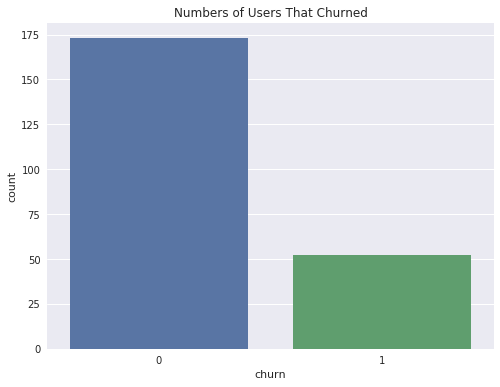

In [35]:
# Visualize churned users

plt.figure(figsize = [8,6])
ax = sns.barplot(data = df_churn, x = 'churn', y='count')
plt.title("Numbers of Users That Churned");

Now lets calculate the churn rate.

In [36]:
# Churn rate

churn_rate = 52 / (173+52) * 100

In [37]:
print(f"Calculated churn rate is {churn_rate}%")

Calculated churn rate is 23.11111111111111%


> The total number of users who churned were 52 and those who stayed were 173. As a result the rate of churn is less than 50% at about 23%. This rate is significantly high.

##### 2. Duration of users who stayed and those who churned

In [38]:
df_len = df.filter(df.churn ==1)
len_df = df_len.toPandas()
len_df.length.dropna(inplace=True)

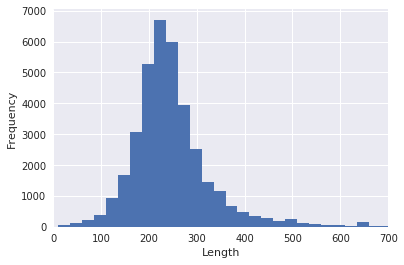

In [39]:
# plot the distribution
bin_edges = np.arange (10, len_df['length'].max()+25, 25)
plt.hist(data = len_df, x = 'length', bins = bin_edges)
plt.xlim(0,700)
plt.xlabel('Length')
plt.ylabel('Frequency');

In [40]:
df_len_stay = df.filter(df.churn ==0)
len_df_stay = df_len_stay.toPandas()
len_df_stay.length.dropna(inplace=True)

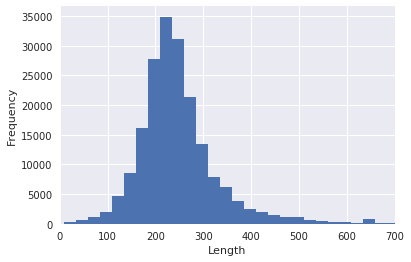

In [41]:
# plot the distribution
bin_edges = np.arange (10, len_df_stay['length'].max()+25, 25)
plt.hist(data = len_df_stay, x = 'length', bins = bin_edges)
plt.xlim(0,700)
plt.xlabel('Length')
plt.ylabel('Frequency');

> From the 2 graphs above, we can infer that the duration for users who churned and those who stayed looks relatively the same, almost normally distributed about the point 200.

##### Churn by Gender

In [42]:
# Create gender df grouped by churn and gender

df_gender = df.select(['userId', 'churn', 'gender']).dropDuplicates().groupBy('gender', 'churn').count()

In [43]:
df_gender.show()

+------+-----+-----+
|gender|churn|count|
+------+-----+-----+
|     F|    0|   84|
|     F|    1|   20|
|     M|    0|   89|
|     M|    1|   32|
+------+-----+-----+



In [44]:
df_gender = df_gender.toPandas()
df_gender = df_gender.sort_values('count', ascending = False)

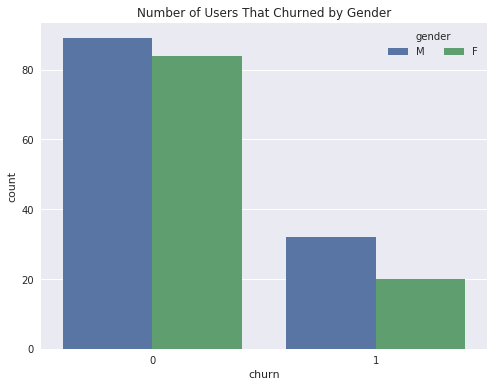

In [45]:
# seaborn barplot
plt.figure(figsize = [8,6])
ax = sns.barplot(data = df_gender, x = 'churn', y='count', hue = 'gender')
ax.legend(loc = 1, ncol = 2, framealpha =1, title = 'gender')
plt.title("Number of Users That Churned by Gender");

> From the graph we can see that more male users churned as compared to their female counterparts.

##### Churn by Level

In [46]:
# Create the level dataframe

df_level = df.select(['userId', 'churn', 'level']).dropDuplicates().groupBy('level','churn').count()

In [47]:
df_level.show()

+-----+-----+-----+
|level|churn|count|
+-----+-----+-----+
| free|    0|  149|
| paid|    0|  129|
| free|    1|   46|
| paid|    1|   36|
+-----+-----+-----+



In [48]:
df_level = df_level.toPandas()

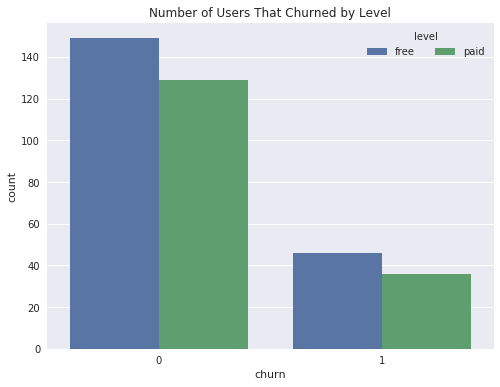

In [49]:
# plot the barplot using seaborn
plt.figure(figsize = [8,6])
ax = sns.barplot(data = df_level, x = 'churn', y='count', hue = 'level')
ax.legend(loc = 1, ncol = 2, framealpha =1, title = 'level')
plt.title("Number of Users That Churned by Level");

## 4. Feature Engineering and Selection<a id='fe'></a>

[Move Up](#mu)
    
    
After performing Exploratory Data Analysis (EDA), we are ready to build the features that will be used to train our predictive model. These features include both categorical and numerical variables:

**Categorical Features:**
- `gender`: Gender of the user.
- `level`: Subscription level (free or premium).

**Numerical Features:**
- `number of songs per session`: The average number of songs played per session.
- `number of rollads actions`: Total number of "Roll Advert" actions.
- `number of thumb down actions`: Total number of "Thumbs Down" actions.
- `number of thumbs up actions`: Total number of "Thumbs Up" actions.
- `number of friends added`: Total number of friends added.
- `number of songs added to playlist`: Total number of songs added to user playlists.
- `number of different artists listened to`: Total number of unique artists listened to on Sparkify.
- `number of days since registering`: Time elapsed since the user registered.

These features will be used to create a user-level dataframe, where each row represents information about an individual user. We will also introduce a `churn` label indicating whether a user has churned or not. Once the `userId` column is dropped, this dataframe can be vectorized, standardized, and fed into various machine learning algorithms.

To prepare the categorical variables for modeling, we will convert them into numeric format.


#### Gender Dummies

In [50]:
# Create gender dataframe

gender = df.select(['userId', 'gender']).dropDuplicates()

In [51]:
# Create gender column

gender = gender.withColumn('gender', when(col('gender') == 'F', 1).otherwise(0))

#### Level

Next feature is the `level` column. Since there are different same levels for same user at different times, we will use the ranking technique so we can have the most recent levels for each user at the top.

First lets go ahead and rank each user level base on time.

In [52]:
df2 = df.select(['userId', 'level', 'ts']).dropDuplicates().sort('userId')

In [53]:
w = Window.partitionBy("userId").orderBy(desc("ts"))

In [54]:
df2 = df2.withColumn("Rank", dense_rank().over(w))

Now lets filter for only rank 1 and convert to dummy numbers(1s and 0s) 

In [55]:
level = df2.filter(df2.Rank == 1).drop(df2.Rank)

In [56]:
level = level.drop('ts')

In [57]:
level = level.withColumn('level', when(col('level') == 'paid', 1).otherwise(0))

In [58]:
level.show(20)

+------+-----+
|userId|level|
+------+-----+
|    10|    1|
|   100|    1|
|100001|    0|
|100002|    1|
|100003|    0|
|100004|    1|
|100005|    0|
|100006|    0|
|100007|    1|
|100008|    0|
|100009|    0|
|100010|    0|
|100011|    0|
|100012|    0|
|100013|    1|
|100014|    1|
|100015|    1|
|100016|    0|
|100017|    0|
|100018|    0|
+------+-----+
only showing top 20 rows



#### Average number of songs

In [59]:
song = df.filter(df.page == "NextSong").groupBy('userId','sessionId').count()

In [60]:
df.filter(df.page == "NextSong").groupBy('userId','sessionId').count().show(2)

+------+---------+-----+
|userId|sessionId|count|
+------+---------+-----+
|    92|      358|   57|
|    42|      433|   16|
+------+---------+-----+
only showing top 2 rows



In [61]:
song = song.groupby('userId').agg({"count":"avg"})
song = song.withColumnRenamed("avg(count)", "avg_song")

In [62]:
song.show(2)

+------+------------------+
|userId|          avg_song|
+------+------------------+
|100010|39.285714285714285|
|200002|              64.5|
+------+------------------+
only showing top 2 rows



#### Number of rollads actions

In [63]:
rollad = df.select(["userId", "page"])

In [64]:
rollad_event = udf(lambda x: 1 if x == "Roll Advert" else 0, IntegerType())

In [65]:
rollad = rollad.withColumn("rollad", rollad_event("page"))

In [66]:
rollad = rollad.groupby('userId').sum("rollad")

In [67]:
rollad = rollad.withColumnRenamed("sum(rollad)", "roll_ad")

In [68]:
rollad.show(2)

+------+-------+
|userId|roll_ad|
+------+-------+
|100010|     52|
|200002|      7|
+------+-------+
only showing top 2 rows



#### Number of friends added

In [69]:
friends = df.select(["userId", "page"])

In [70]:
add_friend = udf(lambda x: 1 if x == "Add Friend" else 0, IntegerType())

In [71]:
friends = friends.withColumn("add_friend", add_friend("page"))

In [72]:
friends = friends.groupby('userId').sum("add_friend")

In [73]:
friends = friends.withColumnRenamed("sum(add_friend)", "add_friend")

In [74]:
friends.show(2)

+------+----------+
|userId|add_friend|
+------+----------+
|100010|         4|
|200002|         4|
+------+----------+
only showing top 2 rows



#### Thumbs down actions

In [75]:
thumbdown = df.select(["userId", "page"])

In [76]:
thumddown_event = udf(lambda x: 1 if x == "Thumbs Down" else 0, IntegerType())

In [77]:
thumbdown = thumbdown.withColumn("Thumbs Down", thumddown_event("page"))
thumbdown = thumbdown.groupby('userId').sum("Thumbs Down")
thumbdown = thumbdown.withColumnRenamed("sum(Thumbs Down)", "thumbs_down")

In [78]:
thumbdown.show(2)

+------+-----------+
|userId|thumbs_down|
+------+-----------+
|100010|          5|
|200002|          6|
+------+-----------+
only showing top 2 rows



#### Thumbs up actions

In [79]:
thumbup = df.select(["userId", "page"])

In [80]:
thumbup_event = udf(lambda x: 1 if x == "Thumbs Up" else 0, IntegerType())

In [81]:
thumbup = thumbup.withColumn("Thumbs Up", thumbup_event("page"))
thumbup = thumbup.groupby('userId').sum("Thumbs Up")
thumbup = thumbup.withColumnRenamed("sum(Thumbs Up)", "thumbs_up")

In [82]:
thumbup.show(2)

+------+---------+
|userId|thumbs_up|
+------+---------+
|100010|       17|
|200002|       21|
+------+---------+
only showing top 2 rows



#### Playlist Songs

In [83]:
playlist = df.select(["userId", "page"])

In [84]:
add_playlist = udf(lambda x: 1 if x == "Add to Playlist" else 0, IntegerType())

In [85]:
playlist = playlist.withColumn("Playlist", add_playlist("page"))
playlist = playlist.groupby('userId').sum("Playlist")
playlist = playlist.withColumnRenamed("sum(Playlist)", "playlist")

In [86]:
playlist.show(2)

+------+--------+
|userId|playlist|
+------+--------+
|100010|       7|
|200002|       8|
+------+--------+
only showing top 2 rows



#### Artists listened to

In [87]:
artists = df.select("userId", "artist").dropDuplicates().groupby("userId").count()

In [88]:
artists = artists.withColumnRenamed("count", "num_artists")

In [89]:
artists.show(2)

+------+-----------+
|userId|num_artists|
+------+-----------+
|100010|        253|
|200002|        340|
+------+-----------+
only showing top 2 rows



#### User duration

In [90]:
df_days = df.select(['userId', 'registration', 'ts', 'churn']).dropDuplicates().sort('userId')

In [91]:
# Reorder timestamp

w = Window.partitionBy("userId").orderBy(desc("ts"))

In [92]:
# Generate a rank base on timestamp

df_days = df_days.withColumn("Rank", dense_rank().over(w))

In [93]:
# Get only rank 1

df_days = df_days.filter(df_days.Rank == 1).drop(df_days.Rank)

In [94]:
# Subtract registration timestamp

df_days = df_days.withColumn("delta_days", (df_days['ts']) - (df_days['registration']))

In [95]:
# Convert timestamp to days

df_days = df_days.withColumn('days',(df_days['delta_days']/1000/3600/24))

In [96]:
# Select only needed columns

duration = df_days.drop('registration', 'ts', 'churn', 'delta_days')

In [97]:
duration.show()

+------+------------------+
|userId|              days|
+------+------------------+
|    10| 51.76265046296297|
|   100| 64.87377314814815|
|100001| 44.80021990740741|
|100002|160.47207175925925|
|100003|22.748113425925926|
|100004|172.44008101851853|
|100005| 85.19559027777778|
|100006| 9.127164351851851|
|100007|115.38761574074074|
|100008| 68.22856481481482|
|100009| 37.43827546296296|
|100010|  55.6436574074074|
|100011| 5.165115740740741|
|100012| 43.05261574074074|
|100013| 44.17873842592593|
|100014| 85.08340277777778|
|100015| 67.87921296296297|
|100016| 75.01533564814815|
|100017| 78.88440972222223|
|100018|110.71211805555555|
+------+------------------+
only showing top 20 rows



##### Label

In [98]:
label = df.select("userId", "churn").dropDuplicates().groupby("userId", "churn").count()

In [99]:
label = label.drop('count')

In [100]:
label = label.withColumnRenamed("churn", "label")

In [101]:
label.show()

+------+-----+
|userId|label|
+------+-----+
|100010|    0|
|200002|    0|
|   125|    1|
|   124|    0|
|    51|    1|
|     7|    0|
|    15|    0|
|    54|    1|
|   155|    0|
|100014|    1|
|   132|    0|
|   154|    0|
|   101|    1|
|    11|    0|
|   138|    0|
|300017|    0|
|100021|    1|
|    29|    1|
|    69|    0|
|   112|    0|
+------+-----+
only showing top 20 rows



#### Features Dataset

In [104]:
# Merge all the engineered features

feature_df = gender.join(level, ["userId"]).join(song, ["userId"]).join(rollad, ["userId"]). \
            join(thumbdown, ["userId"]).join(thumbup, ["userId"]).join(friends, ["userId"]). \
            join(playlist, ["userId"]).join(artists, ["userId"]).join(duration, ["userId"]).join(label, ["userId"])

In [105]:
# Drop userid column

feature_df = feature_df.drop('userId')

In [106]:
feature_df.show(2)

+------+-----+------------------+-------+-----------+---------+----------+--------+-----------+-----------------+-----+
|gender|level|          avg_song|roll_ad|thumbs_down|thumbs_up|add_friend|playlist|num_artists|             days|label|
+------+-----+------------------+-------+-----------+---------+----------+--------+-----------+-----------------+-----+
|     1|    0|39.285714285714285|     52|          5|       17|         4|       7|        253| 55.6436574074074|    0|
|     0|    1|              64.5|      7|          6|       21|         4|       8|        340|70.07462962962963|    0|
+------+-----+------------------+-------+-----------+---------+----------+--------+-----------+-----------------+-----+
only showing top 2 rows



#### Preprocessing

In [107]:
# Check schema

feature_df.printSchema()

root
 |-- gender: integer (nullable = false)
 |-- level: integer (nullable = false)
 |-- avg_song: double (nullable = true)
 |-- roll_ad: long (nullable = true)
 |-- thumbs_down: long (nullable = true)
 |-- thumbs_up: long (nullable = true)
 |-- add_friend: long (nullable = true)
 |-- playlist: long (nullable = true)
 |-- num_artists: long (nullable = false)
 |-- days: double (nullable = true)
 |-- label: long (nullable = true)



In [108]:
# Convert feature data type

for feature in feature_df.columns:
    feature_df = feature_df.withColumn(feature, feature_df[feature].cast('float'))

In [109]:
# Confirm changes

feature_df.printSchema()

root
 |-- gender: float (nullable = false)
 |-- level: float (nullable = false)
 |-- avg_song: float (nullable = true)
 |-- roll_ad: float (nullable = true)
 |-- thumbs_down: float (nullable = true)
 |-- thumbs_up: float (nullable = true)
 |-- add_friend: float (nullable = true)
 |-- playlist: float (nullable = true)
 |-- num_artists: float (nullable = false)
 |-- days: float (nullable = true)
 |-- label: float (nullable = true)



#### Vector Assembler

The purpose of vector assembler is to tranform our features into a vector. The vector can then be standardised and fed into our chosen algorithms.

In [110]:
# Select modeling input features

assembler = VectorAssembler(inputCols = ["gender", "level", "avg_song", "roll_ad", "thumbs_down", "thumbs_up", 
                                         "add_friend", "playlist", "num_artists", "days"],
                                        outputCol = "vec_features")

In [111]:
# Apply assembler

feature_df = assembler.transform(feature_df)

In [112]:
feature_df.show(2)

+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+
|gender|level| avg_song|roll_ad|thumbs_down|thumbs_up|add_friend|playlist|num_artists|     days|label|        vec_features|
+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+
|   1.0|  0.0|39.285713|   52.0|        5.0|     17.0|       4.0|     7.0|      253.0|55.643658|  0.0|[1.0,0.0,39.28571...|
|   0.0|  1.0|     64.5|    7.0|        6.0|     21.0|       4.0|     8.0|      340.0| 70.07463|  0.0|[0.0,1.0,64.5,7.0...|
+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+
only showing top 2 rows



#### Standardisation

The next step is data standardisation. Standardisation rescales data features to have a mean of 0 and a standard deviation of 1. This process facilitates fair comparison and improves the performance of machine learning algorithms by ensuring all features are on the same scale.

In [114]:
# Generate scaler for input features

scaler = StandardScaler(inputCol="vec_features", outputCol="features", withStd=True)

In [115]:
# Apply scaler object

scaler_object = scaler.fit(feature_df)

In [117]:
# Transform data

standardised_data = scaler_object.transform(feature_df)

In [118]:
standardised_data.show(2)

+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+--------------------+
|gender|level| avg_song|roll_ad|thumbs_down|thumbs_up|add_friend|playlist|num_artists|     days|label|        vec_features|            features|
+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+--------------------+
|   1.0|  0.0|39.285713|   52.0|        5.0|     17.0|       4.0|     7.0|      253.0|55.643658|  0.0|[1.0,0.0,39.28571...|[2.00127105192366...|
|   0.0|  1.0|     64.5|    7.0|        6.0|     21.0|       4.0|     8.0|      340.0| 70.07463|  0.0|[0.0,1.0,64.5,7.0...|[0.0,2.0844250013...|
+------+-----+---------+-------+-----------+---------+----------+--------+-----------+---------+-----+--------------------+--------------------+
only showing top 2 rows



> Standardization, as evidenced by the comparison between vec_features and features, demonstrates the transformation of original feature values to standardized ones. This process scales the features to have a mean of 0 and a standard deviation of 1, ensuring uniform contribution of all features to the model and enhancing model training efficiency.

#### Data Splitting

Data splitting involves dividing the dataset into separate subsets, such as training, testing, and validation sets, to facilitate machine learning tasks. In this specific case, the data was split into three portions: 60% for training, 20% for testing, and 20% for validation. This division enables model training, evaluation, and validation, ensuring effective model performance.

In [119]:
# Check count of label

standardised_data.groupby('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  1.0|   52|
|  0.0|  173|
+-----+-----+



In [120]:
train, test, valid = standardised_data.randomSplit([0.6, 0.2, 0.2], seed = 2024)
print(f"Training Dataset: {train.count()}")
print(f"Test Dataset: {test.count()}")
print(f"Validation Dataset: {valid.count()}")

Training Dataset: 134
Test Dataset: 46
Validation Dataset: 45


## 5. Modeling<a id='dm'></a>

[Move Up](#mu)

In this phase of the project, we will explore different machine learning classification algorithms to address our churn prediction task. Given that churn prediction is a binary classification problem where users can either churn (1) or stay (0), we will consider the following classification algorithms:

1. **Logistic Regression**: This is our initial model choice due to its suitability for binary classification problems. Logistic regression offers good explainability, ease of interpretation, and efficiency in training. It is also less prone to overfitting.

2. **Random Forest Classifier**: Random Forest is an ensemble method that can handle classification tasks effectively. It creates multiple decision trees and combines their predictions through a majority vote. Random Forest is robust and performs well on imbalanced datasets, which is relevant to our case.

3. **Gradient-Boosted Tree Classifier (GBT)**: GBT is known for its predictive accuracy. It builds trees sequentially, with each tree correcting errors made by the previous ones. Although GBT has a risk of overfitting, it performs well with unbalanced data, making it a valuable choice for churn prediction.

4. **Linear Support Vector Machine (Linear SVC)**: Linear SVC is a binary classification algorithm that excels when clear margins of separation exist between classes. It is memory-efficient and can be suitable for our task.

5. **Naive Bayes**: Finally, we will explore the Naive Bayes classifier, known for its simplicity, ease of implementation, and speed.

## Model Training and Evaluation Steps

The process for training and evaluating these models consists of the following steps:

1. **Instantiate Models**: We initialize each of the selected models.

2. **Fit Models on Train Data**: The models are trained on the training dataset, learning patterns and relationships from the features.

3. **Predictions**: We generate predictions on the test dataset using the trained models.

4. **Model Evaluation**: We evaluate the performance of each model based on the following metrics:
   - **Accuracy**: To gauge overall correctness of the model.
   - **F1 Score**: Given the imbalanced class distribution, we prioritize the F1 score as it provides a balanced measure of precision and recall.

The goal is to identify the model with the best F1 score, accuracy, and computational efficiency. Once the winning model is determined, we will proceed to fine-tune its parameters for optimal performance.


#### Instantiate all the algorithms

We don't know which algorithms will do well on this dataset. We will evaluate algorithms using the appropriate metric.

In [124]:
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label')
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', seed=2024)
gbt = GBTClassifier(featuresCol = 'features', labelCol = 'label', seed=2024)
lsvc = LinearSVC(featuresCol = 'features', labelCol = 'label')
nb = NaiveBayes(featuresCol = 'features', labelCol = 'label')

In [130]:
# Define model list

model_list = [lr,rf,gbt]

In [126]:
# Evaluator we are using is multiclassclassificationevaluator to get the F1 scores

evaluator = MulticlassClassificationEvaluator(labelCol = 'label', predictionCol='prediction')

Now lets test all the algorithms on the data.

In [ ]:
# Iterate through each defined algorithm
f1_score = []
accuracy_score = []
time_score = []

for model in model_list:
    
    # get model name 
    model_name = model.__class__.__name__
    
    # start time
    start = time.time()
    
    # fit the models on train dataset
    model = model.fit(train)
    print(f"{model_name} training ended......")
    
    # end time
    time_difference = time.time() - start
    time_score.append(time_difference)
    
    # predict
    predictions = model.transform(valid)
    
    # get metrics to evaluate
    f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
    accuracy = predictions.filter(predictions.label == predictions.prediction).count() / (predictions.count())
    
    # Save metrics
    f1_score.append(f1)
    accuracy_score.append(accuracy) 

In [137]:
# Zip the lists together
model_data = list(zip(model_list, f1_score, accuracy_score, time_score))

# Define schema for the DataFrame
schema = ["Model", "F1", "Accuracy", "Training Time"]

# Create DataFrame from zipped data and schema
performance_df = pd.DataFrame(model_data, columns=schema)

In [138]:
# Show the DataFrame

performance_df.head()

,Model,F1,Accuracy,Training Time
0,LogisticRegression_f1ed973b9f79,0.767702,0.755556,934.575837
1,RandomForestClassifier_8318e3148f42,0.860135,0.866667,372.905765
2,GBTClassifier_bc9a67dce365,0.778836,0.755556,546.275108


> We evaluated 3 algorithms using default parameters to create a baseline model. From the dataframe above, we can see that the randomforest classifier had the highest F1 score and accuracy of 0.86 and 0.87 respectively. It was also the fastest to train with a train time of 372 seconds. All of these algorithms performed really well but we will go with randomforest classifier as it was the fastest and had the highest metric values.

#### Hyperparameter Tuning

After determining the best algorithm to use based on the performance metric, stability and complexity, then the next step is search for the best hyperparameters that yields the best result. This is called hyperparameter tuning. In the algorithm evalution step above, randomforest classifier produced the best F1 score of `0.86` and was fastest to be trained. As such we will go ahead and fine tune it.

In [140]:
# Explore LR parameters to tune.

print(rf.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

For RF model tuning, I'll focus on two parameters: NumTrees and MaxDepth.

* `NumTrees`: Increasing the number of trees in a Random Forest generally improves performance by reducing variance and enhancing predictive power. However, adding too many trees can lead to diminishing returns and increased computational costs. A typical range for fine-tuning this parameter is between 50 to 200 trees.

* `MaxDepth`: Controls the maximum depth of each tree in the Random Forest. A deeper tree can capture more complex relationships in the data but also increases the risk of overfitting, especially with large values. It's crucial to find the right balance to prevent overfitting. A common range for fine-tuning maxDepth is between 5 to 20.

NumFolds argument Determines the number of folds in cross-validation. While a higher number of folds can lead to a more reliable estimate of model performance, it also increases computational time. It's essential to balance between computational efficiency and model evaluation accuracy. As a result I will be using a fold of 3.

In [142]:
# Define Grid search parameters

paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [20, 50, 100]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()


# Define your crossvalidation pipeline
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName = "f1"),
                          numFolds=3)

In [143]:
%%time
cvModel = crossval.fit(train)

CPU times: user 15.8 s, sys: 5.96 s, total: 21.8 s
Wall time: 1h 43min 37s


In [144]:
# Check crossval F1 scores

cvModel.avgMetrics

[0.6925781343409529,
 0.7241351406337111,
 0.7241351406337111,
 0.7169712892178315,
 0.7225877604369445,
 0.7225877604369445,
 0.7326997521431988,
 0.7273635043767114,
 0.7273635043767114]

#### Finalizing Model

In this section we will finalize the model by training it on the entire training dataset and make predictions for the hold-out test dataset to confirm our findings.

In [146]:
# Transform validation dataset

results = cvModel.transform(valid)

In [147]:
# Compute accuracy

accuracy = results.filter(results.label == results.prediction).count() / (results.count())

In [148]:
# Check best parameters

best_model = cvModel.bestModel
print (f"Best Param (numTrees): {best_model._java_obj.getNumTrees()}")
print (f"Best Param (MaxDepth): {best_model._java_obj.getMaxDepth()}")

Best Param (numTrees): 100
Best Param (MaxDepth): 5


In [149]:
print('F1 for our best model is:', evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

F1 for our best model is: 0.7788359788359788


In [150]:
print('Accuracy for our best model is:', evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))

Accuracy for our best model is: 0.7555555555555555


After thorough hyperparameter tuning, the final Random Forest model exhibits optimal performance with numTrees set to `100` and maxDepth set to `5`. Before tuning, the model achieved an F1 score of `0.86`, which was reduced to an average of `0.78` after tuning. This clearly shows that using the model with default parameters generated better F1 score than using tuned parameters even though the final F1 score is great. There might be various reasons to this:

* Either the range selected for the paramters during tuning wasnt extensive enough
* Also, we used minimal folds of `3` instead of a higher number.
* We could have added additional parameters to optmise.
* Imbalance splitting of data.

The significance of these parameters lies in their direct impact on the model's predictive power and generalization ability. The choice of `numTrees` influences the diversity and robustness of the ensemble, while `maxDepth` controls the complexity of individual decision trees.

The selection of numTrees at `100` strikes a balance between model `complexity` and `computational efficiency`, ensuring adequate ensemble diversity without excessive computational costs. Similarly, setting `maxDepth` to `5` helps mitigate the risk of `overfitting` by limiting the depth of individual trees.

In terms of choice of metric score, we went with F1 and Accuracy because,

* **F1 Score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between these two metrics, making it particularly useful when dealing with imbalanced datasets. 

* **Accuracy:** Accuracy measures the proportion of correctly predicted data points out of all predictions made. 

For example, an F1 score of `0.78` means that `78%` of the positive cases were correctly identified by the model, while an accuracy of `0.76` means that `76%` of all predictions made by the model were correct. These metrics provide insights into the model's effectiveness in correctly classifying instances from the dataset.

Overall, the refined model parameters contribute to the model's optimal performance, as evidenced by the lower `F1 score`. This evaluation underscores the importance of careful parameter selection and highlights the significant impact it can have on the model's qualities and effectiveness in predictive tasks.

#### Feature Importance

Following model selection and evaluation, assessing feature importance helps identify the most impactful features in the best-performing model. Visualizing this using charts, such as bar plots, facilitates interpretation and informs decisions on feature selection or model refinement.

In [151]:
importances = best_model.featureImportances

In [152]:
x_values = list(range(len(importances)))

In [153]:
feature_list = list(["gender", "level", "avg_song", "roll_ad", "thumbs_down", "thumbs_up", "add_friend", 
                     "playlist", "num_artists", "days"])

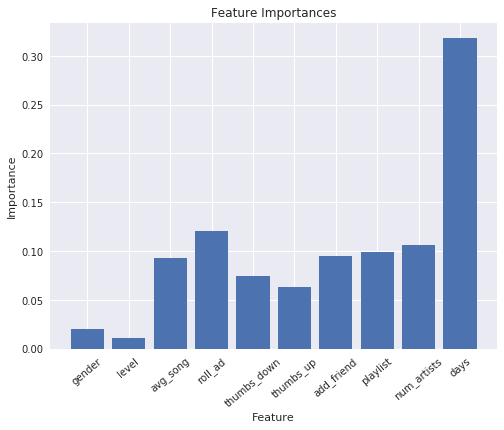

In [154]:
plt.figure(figsize=[8,6])
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances');

The examination of feature importance underscores that "days since registered" emerged as the most influential feature in the model, indicating its strong predictive power in determining user churn. Conversely, "gender" and "level" demonstrated minimal impact on the model's decision-making process, suggesting their limited relevance in predicting churn behavior.

## 6. Conclusion and Recommendation<a id='car'></a>

[Move Up](#mu)

In this project, we set out to tackle the challenge of predicting churn within Sparkify's user base. We undertook a comprehensive journey from data loading and cleaning to feature engineering and model selection. The results of our analysis have significant implications for Sparkify's business strategy.

#### Insights and Achievements
Through careful exploration and feature engineering, we identified valuable predictors of churn. Notably, subscription level played a crucial role, with free users exhibiting a higher likelihood of churning compared to their paid counterparts. Leveraging these insights, we implemented various machine learning algorithms and found that the Random Forest model delivered the best performance, achieving an accuracy and F1 score of 0.86.

#### Business Impact
Sparkify can capitalize on these findings to strategically address churn-related challenges. By proactively identifying and targeting customers at risk of churn, Sparkify can offer tailored incentives and promotions. For instance, enticing newer customers with a free trial of the premium ad-free service could prove highly effective. In doing so, Sparkify can safeguard its revenue and enhance customer loyalty in a fiercely competitive market.

#### Future Directions
While our project yielded promising results, there are avenues for further improvement. Future work could involve more extensive feature engineering to identify the most influential predictors, leading to enhanced predictive accuracy. Additionally, in-depth investigations into potential overfitting issues, imbalance label and a thorough analysis of mispredicted users could provide valuable insights for refining the churn prediction model.